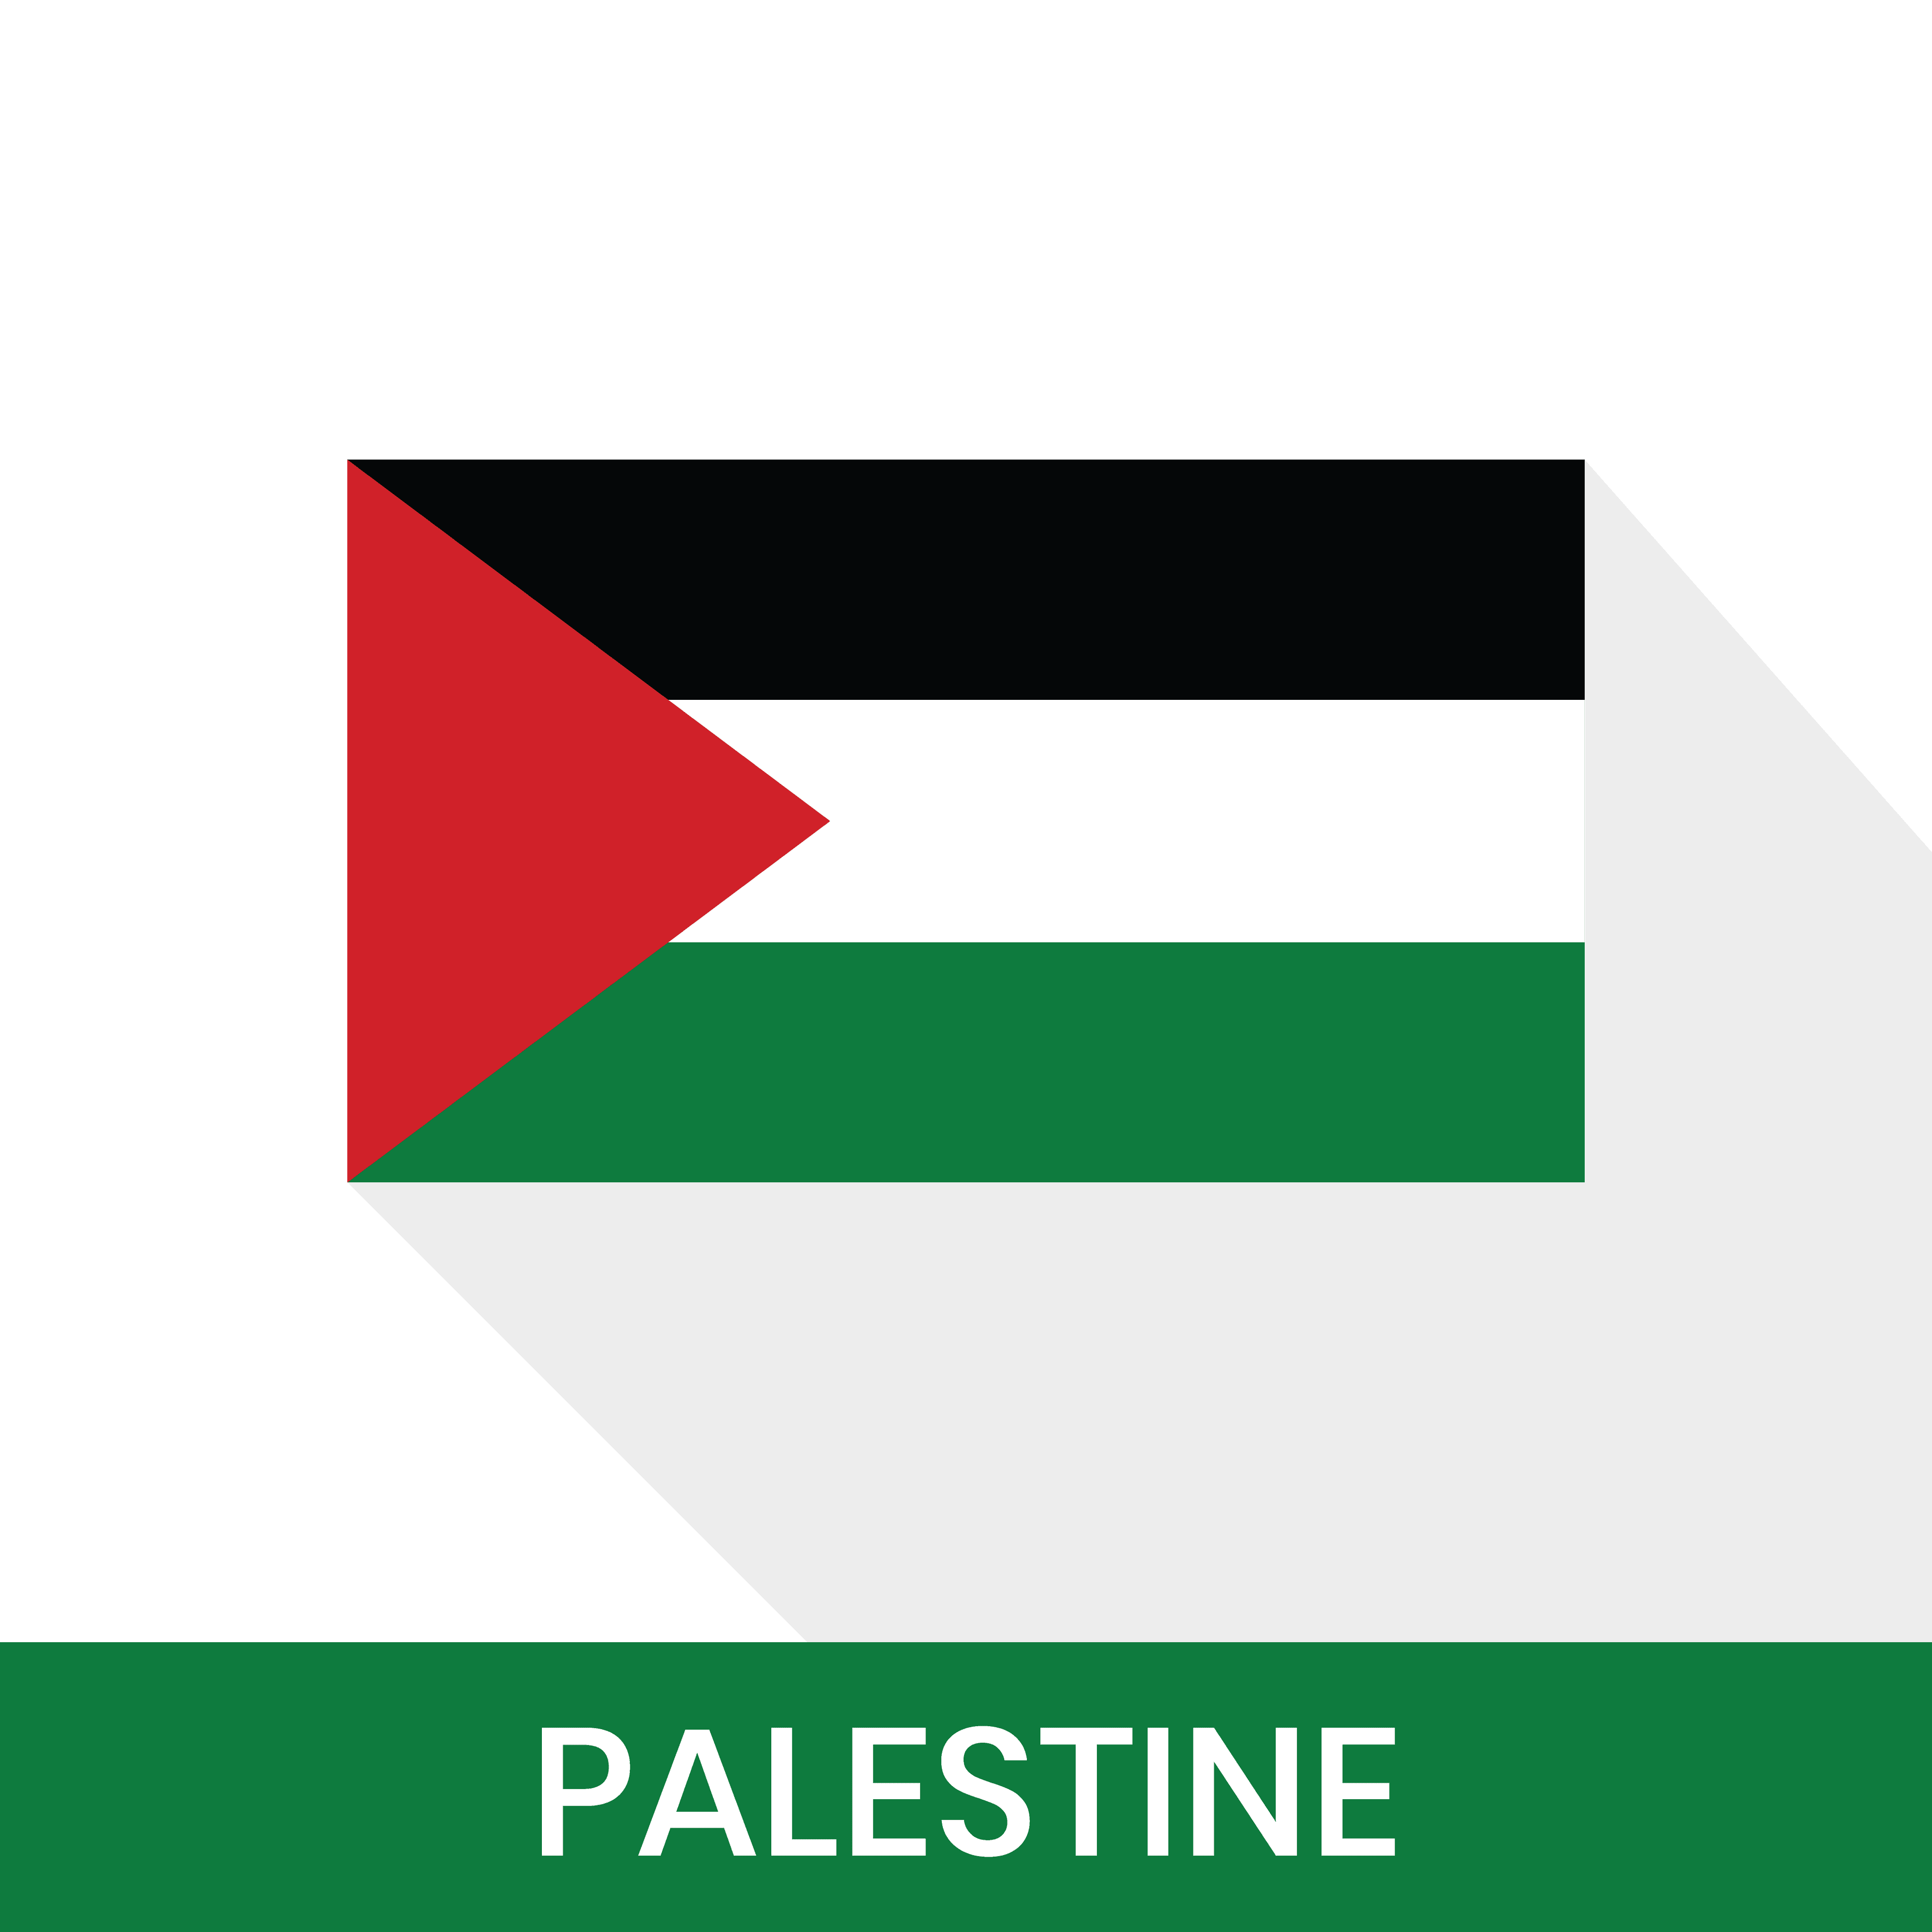 

# Car Price Predection

## EDA

In [1]:
# Load librires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [2]:
data=pd.read_csv('car data.csv')
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [3]:
#shape of the data
data.shape

(301, 9)

In [4]:
#check the information of the datasett
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#Describe function
data.describe().style.background_gradient(cmap='winter')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Corelation matrix**

In [6]:
corr=data.corr().style.background_gradient(cmap='winter')
corr

C:\Users\Ameer_Hassan0000\AppData\Local\Temp\ipykernel_23276\2031040878.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr().style.background_gradient(cmap='winter')


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


C:\Users\Ameer_Hassan0000\AppData\Local\Temp\ipykernel_23276\2893601010.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='winter')


<Axes: >

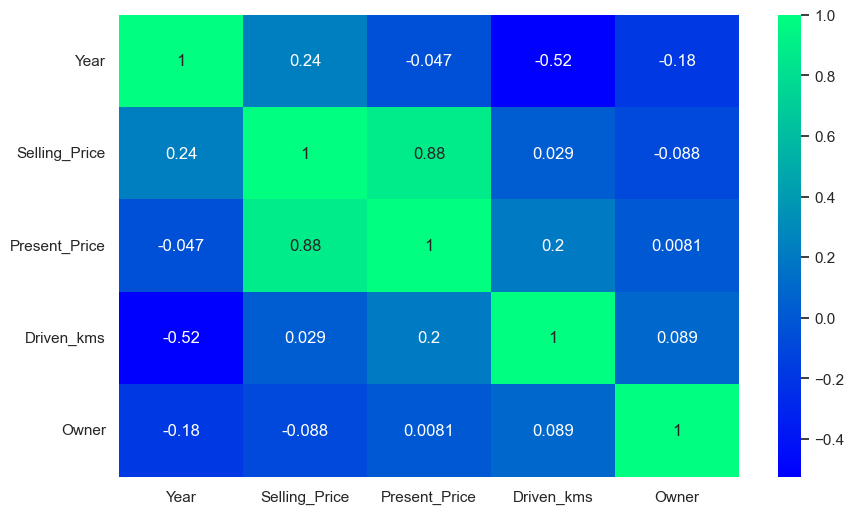

In [7]:
#Let's visualize the correlation matrix iin the seaborn
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(data.corr(),annot=True,cmap='winter')

In [8]:
#data columns
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

**Explore Data analysis (EDA)**

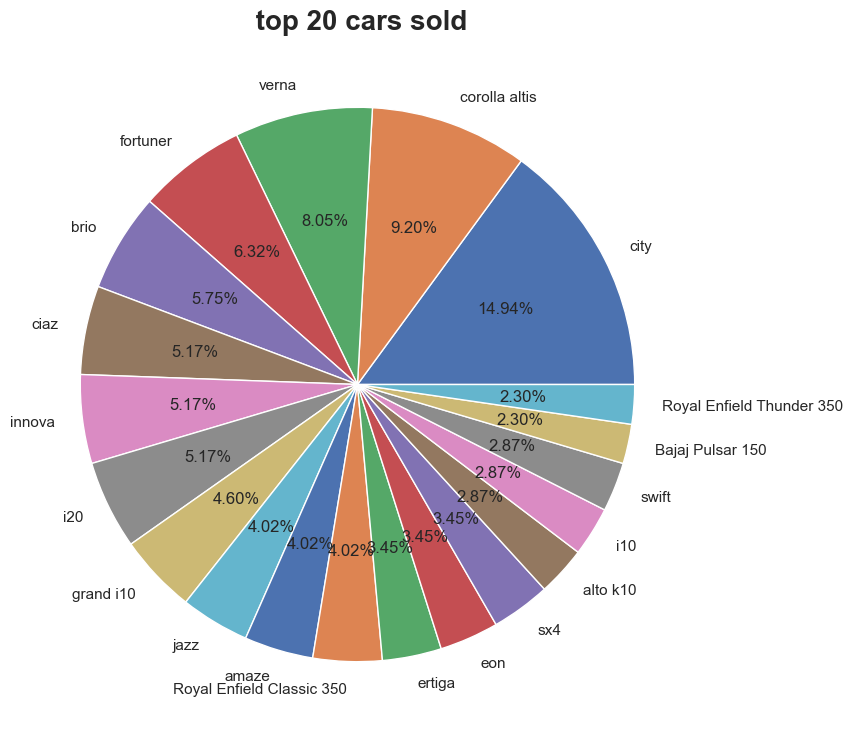

In [9]:
#Let's visualize the car names in the dataset
car_names=data['Car_Name'].value_counts()
#To visualize the top 20 car's sold
label=['city','corolla altis','verna','fortuner','brio','ciaz','innova','i20','grand i10','jazz','amaze','Royal Enfield Classic 350','ertiga','eon','sx4','alto k10','i10','swift','Bajaj Pulsar 150','Royal Enfield Thunder 350']
plt.figure(figsize=(16,9))
plt.pie(car_names[:20],labels=label, autopct='%1.2f%%')
plt.title(" top 20 cars sold",fontsize=20,fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Cars Sold in Each Year')

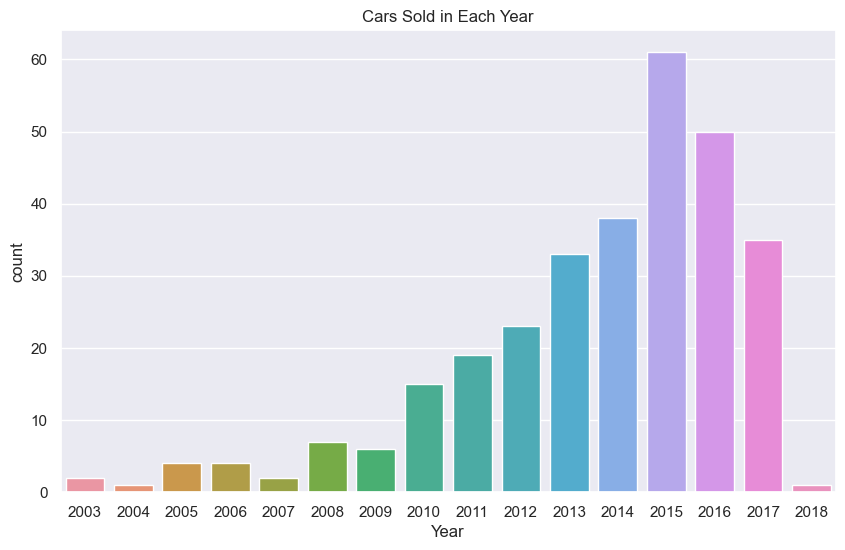

In [10]:
plt.rcParams['figure.figsize']=(10,6)
sns.countplot(data=data,x='Year')
plt.xlabel('Year')
plt.title('Cars Sold in Each Year')

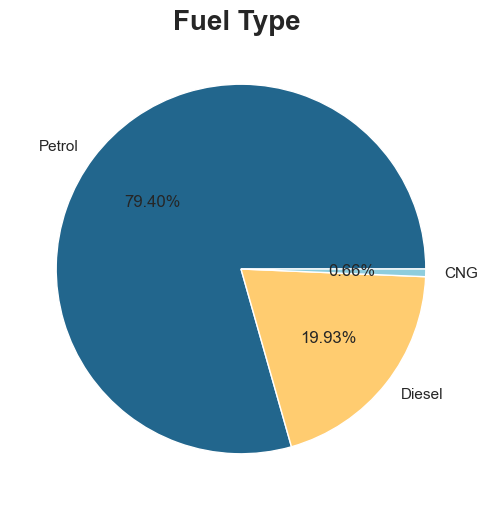

In [11]:
#Let's visualize the car names in the dataset
fuel_type=data['Fuel_Type'].value_counts()
#To visualize the top 20 car's sold
label=['Petrol','Diesel','CNG']
plt.figure(figsize=(10,6))
plt.pie(fuel_type,labels=label, autopct='%1.2f%%',colors=['#22668D','#FFCC70','#8ECDDD'])
plt.title("Fuel Type ",fontsize=20,fontweight='bold')
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Count'>

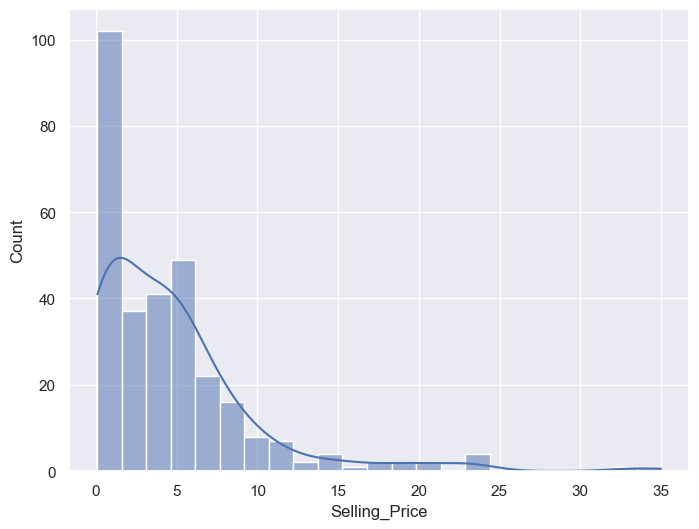

In [12]:
plt.rcParams['figure.figsize']=(8,6)
#to visualize the Selling_Price in the dataset
sns.histplot(data['Selling_Price'],kde=True)

<Axes: xlabel='Fuel_Type', ylabel='Present_Price'>

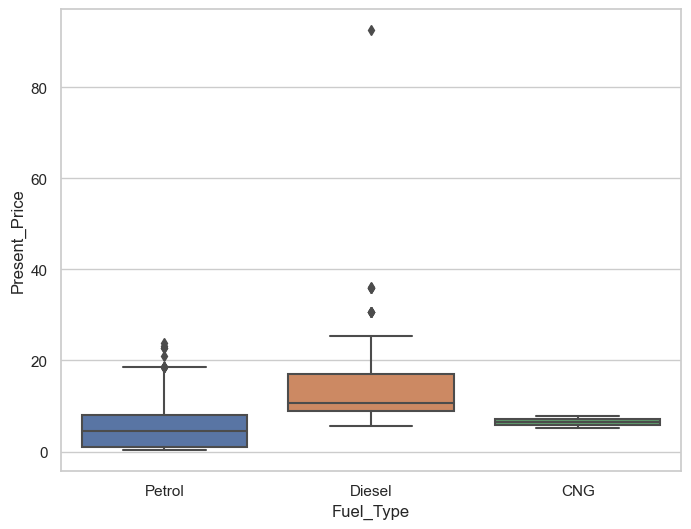

In [13]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y = 'Present_Price', x = 'Fuel_Type', data = data)

<Axes: xlabel='Selling_type', ylabel='Present_Price'>

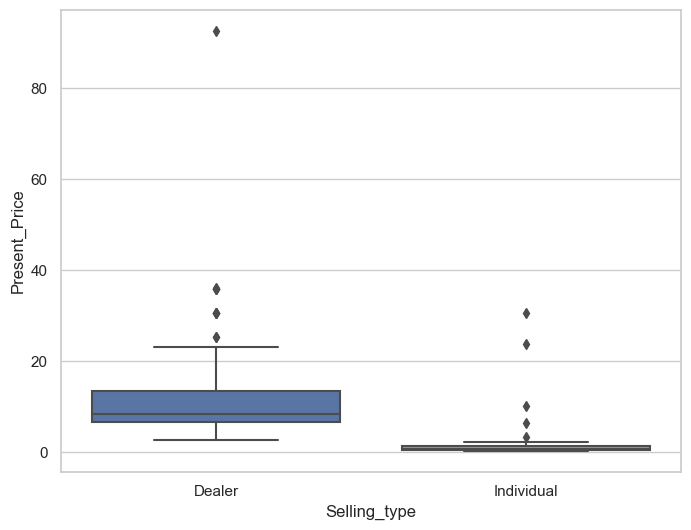

In [14]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y ='Present_Price', x = 'Selling_type', data = data)

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

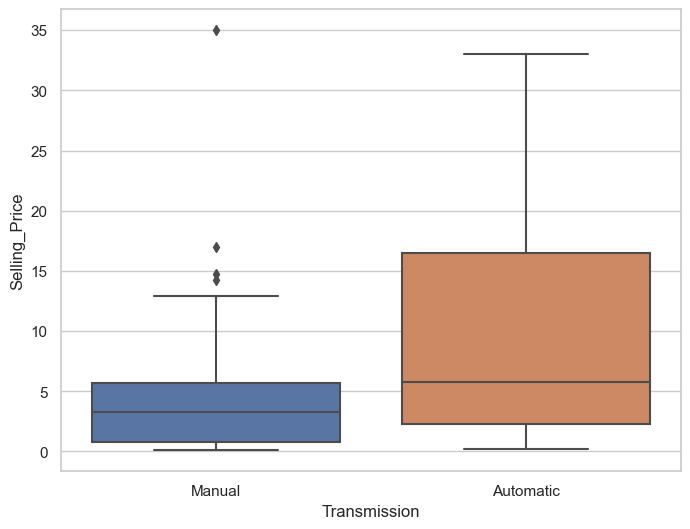

In [15]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y ='Selling_Price', x = 'Transmission', data = data)

# **Model buliding**

#  **Labelencoder**

In [16]:
#Let's import the labelencoder covert the categorical data to numerical
from sklearn.preprocessing import LabelEncoder,StandardScaler
label=LabelEncoder()
data['Car_Name']=label.fit_transform(data['Car_Name'])
data['Fuel_Type']=label.fit_transform(data['Fuel_Type'])
data['Selling_type']=label.fit_transform(data['Selling_type'])
data['Transmission']=label.fit_transform(data['Transmission'])

In [17]:
#Let's divided the data into input into target
X=data.drop(['Selling_Price'],axis=1)
y=data['Selling_Price']

In [18]:
#normalize the data
scaler=StandardScaler()
#Let's normalize the train dataset
X=scaler.fit_transform(X)

In [19]:
#divided the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# LinearRegression

In [20]:
#Install the Linear regression model
linear=LinearRegression()
#let's fi the train data
linear.fit(X_train,y_train)
#Prediction of the test data
linear_pred=linear.predict(X_test)

In [21]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {linear.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {linear.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 87.50
The Train_accuracy: 87.75
